In [8]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

#Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

In [9]:
#create the pipeline
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM
# combine togather to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(f_classif)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)


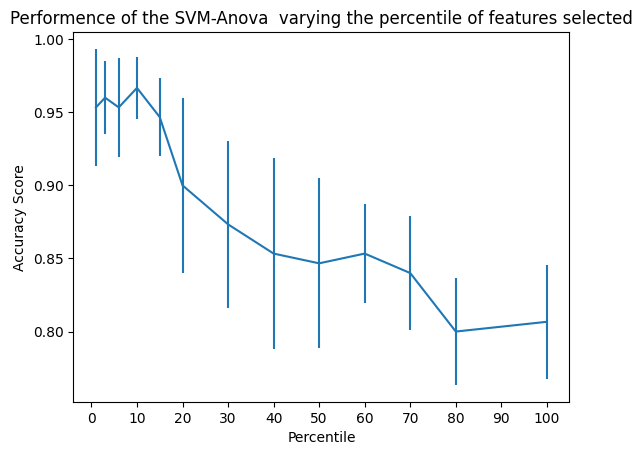

In [10]:
#cross validation
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100)

for percentile in percentiles:
  clf.set_params(anova__percentile=percentile)
  this_scores = cross_val_score(clf, X, y)
  score_means.append(this_scores.mean())
  score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means,np.array(score_stds))
plt.title("Performence of the SVM-Anova  varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.show()